In [1]:
import set_jupyter_env
from apiServer import *
from stats import *

In [2]:
API = ApiServer()
API.help()


__________NERLNET CHECKLIST__________
Nerlnet configuration files are located at config directory.
Make sure data and jsons in correct folder, and jsons include the correct paths
* Data includes: a single csv that includes all the data for the experiment (training and prediction phases)
* Jsons include: - distributed configuration (dc_<name>.json)
                 - connection map (conn_<name>.json)
                 - experiment flow (exp_<name>.json)
* Jsons directory: can be defined by changing the config file: config/jsonsDir.nerlconfig

____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                                           lists available json files in jsons directory (dc, conn, exp) to be used with setJsons and getUserJsons
-list_datasets():                                       reads `hf_repo_ids.json` and list of datasets and files of Nerlnet organizaion on https://huggingface.co/Nerlnet
-download_dataset(idx, dir):                   

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_AEC_1d_2c_1s_4r_4w.json
1.	dc_dist_14d.json
2.	dc_dist_2d_3c_2s_3r_6w.json
3.	dc_fed_dist_14d.json
4.	dc_fed_dist_2d_3c_2s_3r_6w.json
5.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
6.	dc_synt_8d_8w_2c_4s_4r.json
7.	dc_synt_8d_8w_4c_6r_4s.json
8.	dc_synt_distributed_w5_c3_6r_3s_3d.json
9.	dc_test_synt_1d_2c_1s_4r_4w.json
10.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14.	conn_3Router3Clients.json
15.	conn_6RouterCycle6Clients1Source.j

In [4]:
dc = 0
conn_map = 25
exp_flow = 0

In [5]:
API.setJsons(dc , conn_map , exp_flow)
dc_path , conn_map_path , exp_flow_path = API.getUserJsons() # Returns Paths

In [6]:
dc_path

'/usr/local/lib/nerlnet-lib/NErlNet/inputJsonsFiles/DistributedConfig/dc_AEC_1d_2c_1s_4r_4w.json'

In [7]:
API.list_datasets()

0. Nerlnet/skab: ['skab_full.csv', 'skab_full_bins.csv', 'skab_full_poly.csv']
1. Nerlnet/MNist: []
2. Nerlnet/synthetic_norm: ['synthetic_full.csv']


In [8]:
API.download_dataset(0)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

[INFO][2024-07-07 21:39:26,099] Files downloaded to /tmp/nerlnet/data/NerlnetData-master/nerlnet/skab


In [9]:
exp_name = "SKAB_AnomalyDetection"
API.initialization(exp_name , dc_path , conn_map_path , exp_flow_path)

[INFO][2024-07-07 21:39:26,439] 
Network components:
                 Receiver's Address: http://10.0.0.5:8082
                 Frequency: 200 [batches/sec]
                 Batchsize: 100 [samples]
                 devicesIp: ['10.0.0.5']
                 mainServerIp: 10.0.0.5
                 mainServerPort: 8081
                 apiServerIp: 10.0.0.5
                 apiServerPort: 8082
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2', 'w3', 'w4']
                 Sources: ['s1']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-07-07 21:39:26,440] Connections:
[INFO][2024-07-07 21:39:26,440] 		 r1 : ['mainServer', 'r2']
[INFO][2024-07-07 21:39:26,442] 		 r2 : ['r3', 's1']
[INFO][2024-07-07 21:39:26,443] 		 r3 : ['r4', 'c1']
[INFO][2024-07-07 21:39:26,444] 		 r4 : ['r1', 'c2']
[INFO][2024-07-07 21:39:26,445] Experiment name: anomaly_detection_skab
[INFO][2024-07-07 21:39:26,446] Batch size: 100
[INFO][2024-07-07 21:39:26,448] Number of featu

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-07-07 21:39:28,474] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [10]:
API.send_jsons_to_devices()

[INFO][2024-07-07 21:39:28,708] Sending distributed configurations to devices is completed


In [11]:
API.get_experiment_flow(exp_name).get_csv_dataset().set_num_of_labels(0)
API.run_current_experiment_phase()

[INFO][2024-07-07 21:39:28,713] Experiment phase: training_phase of type training starts running...
[INFO][2024-07-07 21:39:28,714] Sending data to sources
[INFO][2024-07-07 21:39:30,122] Data is ready in sources
[INFO][2024-07-07 21:39:30,123] Phase training requested from Main Server
[INFO][2024-07-07 21:39:33,790] Processing experiment phase data
[INFO][2024-07-07 21:39:33,798] Processing experiment phase data completed
[INFO][2024-07-07 21:39:33,799] Start generating communication statistics for training_phase of type training
[INFO][2024-07-07 21:39:33,799] Statistics requested from Main Server
[INFO][2024-07-07 21:39:34,204] Statistics received from Main Server
[INFO][2024-07-07 21:39:34,205] Phase of training_phase training completed


In [12]:
train_stats = API.get_experiment_flow(exp_name).generate_stats()
train_stats_aec = API.get_experiment_flow(exp_name).generate_stats_aec(train_stats)

In [13]:
train_stats.get_communication_stats_main_server()

{'messages_received': 504,
 'messages_sent': 9,
 'messages_dropped': 0,
 'bytes_received': 0,
 'bytes_sent': 0,
 'bad_messages': 0}

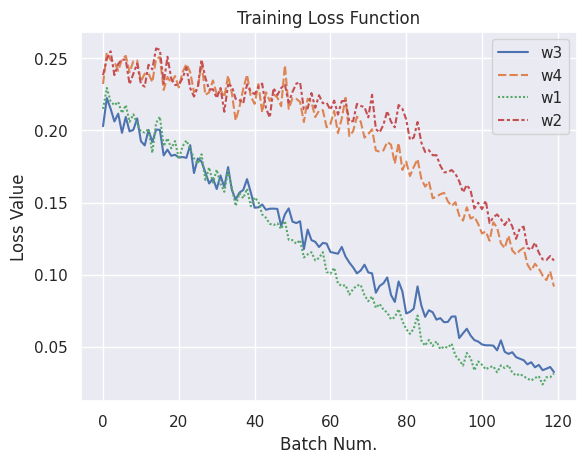

In [14]:
loss_dict = train_stats_aec.get_aec_loss(plot=True)
# train_stats_aec.get_boundaries(plot=True)

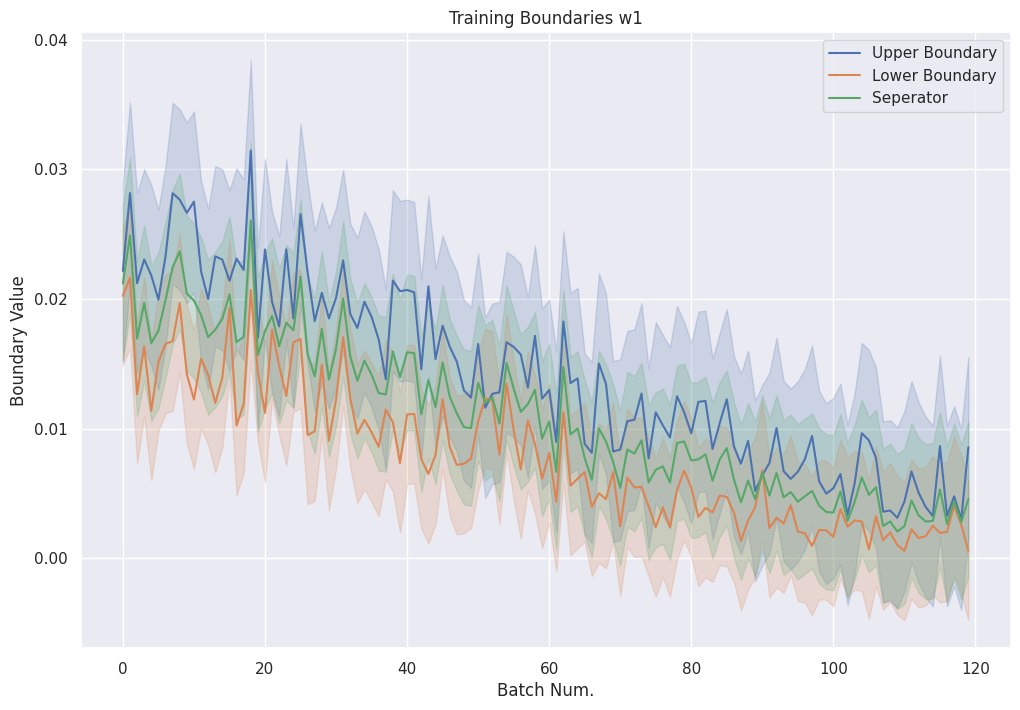

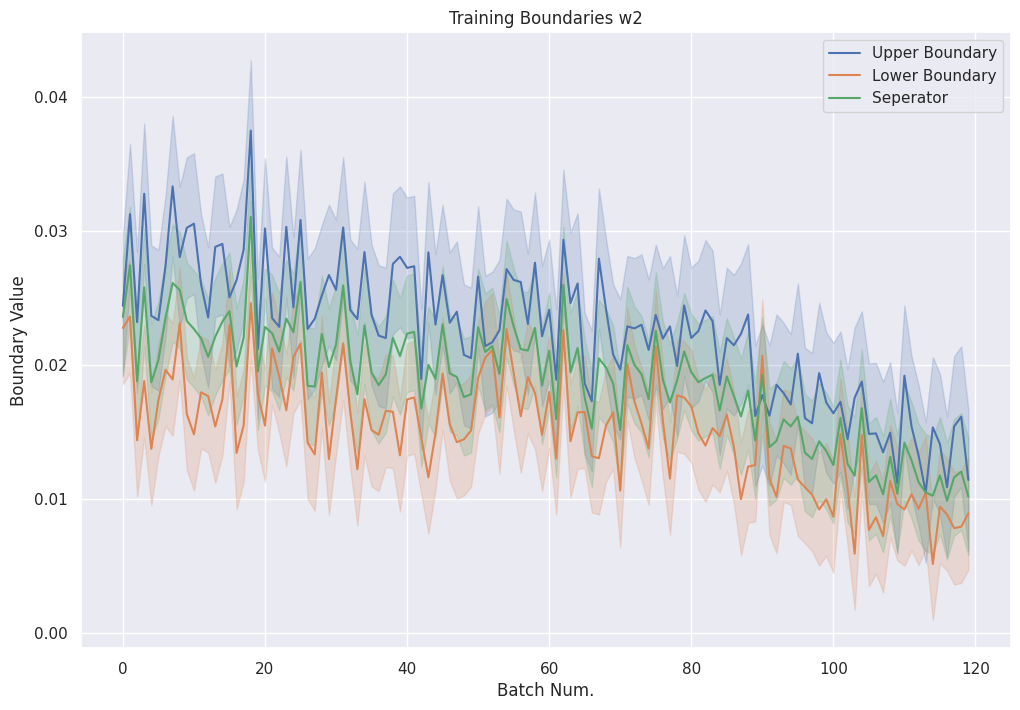

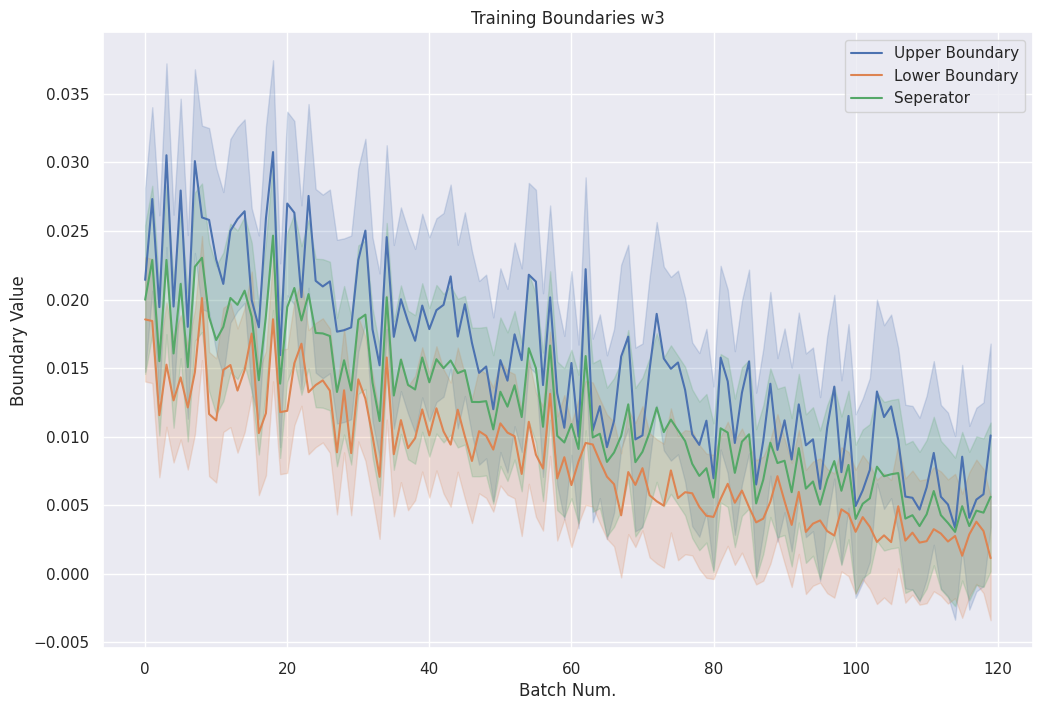

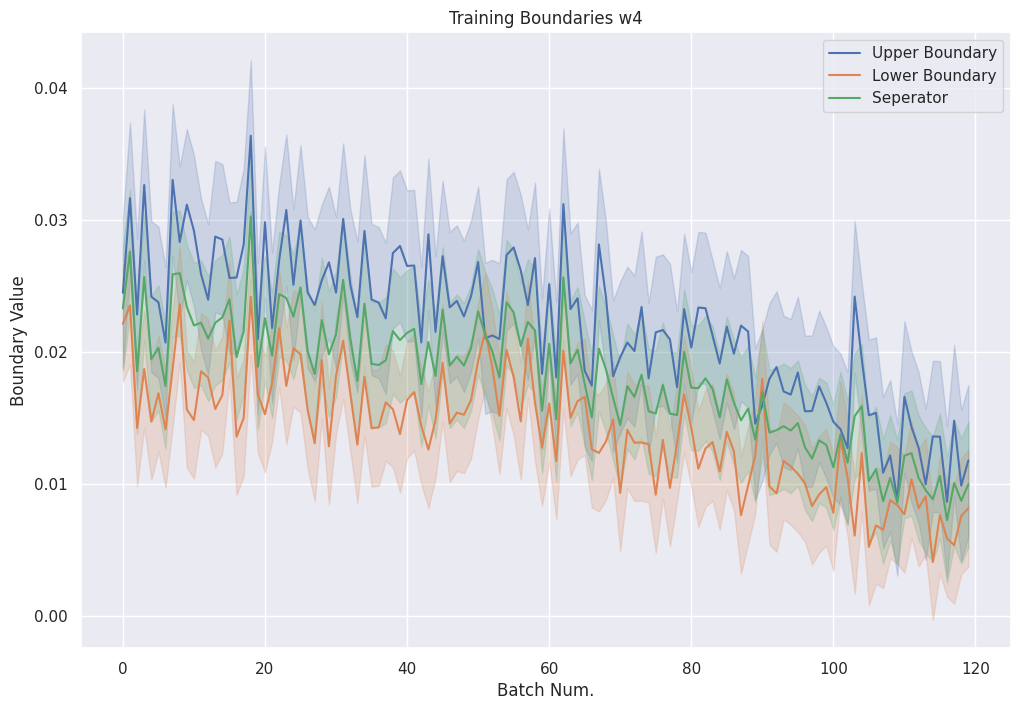

           w1        w2        w3        w4
0    0.022159  0.024412  0.021429  0.024490
1    0.028171  0.031251  0.027328  0.031673
2    0.021212  0.023202  0.019442  0.022849
3    0.023052  0.032770  0.030520  0.032671
4    0.021807  0.023669  0.019485  0.024202
..        ...       ...       ...       ...
115  0.008653  0.014101  0.008539  0.013582
116  0.003256  0.010893  0.004085  0.008641
117  0.004780  0.015420  0.005411  0.014795
118  0.002991  0.016147  0.005801  0.009873
119  0.008559  0.011427  0.010089  0.011774

[120 rows x 4 columns]
           w1        w2        w3        w4
0    0.020242  0.022763  0.018549  0.022147
1    0.021634  0.023613  0.018433  0.023539
2    0.012671  0.014388  0.011564  0.014243
3    0.016343  0.018806  0.015250  0.018718
4    0.011372  0.013744  0.012646  0.014727
..        ...       ...       ...       ...
115  0.001958  0.009437  0.001318  0.007632
116  0.002043  0.008857  0.002873  0.005859
117  0.004037  0.007832  0.003799  0.005348
118  0.0

In [15]:
df_upper, df_lower = train_stats_aec.get_aec_boundaries(plot=True)

In [16]:
API.next_experiment_phase()
API.get_experiment_flow(exp_name).get_csv_dataset().set_num_of_labels(1)
API.run_current_experiment_phase()

[INFO][2024-07-07 21:39:35,612] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-07-07 21:39:35,614] Sending data to sources
[INFO][2024-07-07 21:39:36,409] Data is ready in sources
[INFO][2024-07-07 21:39:36,410] Phase prediction requested from Main Server
[INFO][2024-07-07 21:39:39,640] Processing experiment phase data
[INFO][2024-07-07 21:39:39,654] Processing experiment phase data completed
[INFO][2024-07-07 21:39:39,655] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-07-07 21:39:39,656] Statistics requested from Main Server
[INFO][2024-07-07 21:39:39,709] Statistics received from Main Server
[INFO][2024-07-07 21:39:39,710] Phase of prediction_phase prediction completed


In [17]:
predict_stats = API.get_experiment_flow(exp_name).generate_stats()

In [18]:
_ , conf_mats = predict_stats.get_confusion_matrices(plot=True)
predict_stats.get_model_performence_stats(conf_mats, show=True)
print("Exp Done")

ValueError: cannot reshape array of size 800 into shape (100,1)